---
title: Word2Vec Similarities and Product Recommendations
categories:
- Word2Vec
date: '2025-02-10'
description: Exending Similarities to Recommendations
draft: false
image: genism.png
image-alt: tensor
---

The prime purpose of this article is to demonstrate the creation of embedding vectors using gensism `Word2Vec`.

![](genism.png)

<a href="https://colab.research.google.com/github/ArunKoundinya/DeepLearning/blob/main/posts/Word2Vec/Similarities_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reconstruction of famous `king - man + woman = queen`

In [83]:
from gensim.models import Word2Vec

sentences = [
    ["the", "king", "rules", "the", "kingdom", "with", "wisdom"],
    ["the", "queen", "leads", "the", "kingdom", "with", "grace"],
    ["a", "prince", "inherits", "the", "throne", "from", "his", "father"],
    ["a", "princess", "inherits", "the", "throne", "from", "her", "mother"],
    ["the", "king", "and", "the", "queen", "govern", "together"],
    ["the", "prince", "respects", "his", "father", "the", "king"],
    ["the", "princess", "admires", "her", "mother", "the", "queen"],
    ["the", "actor", "performs", "in", "a", "grand", "theater"],
    ["the", "actress", "won", "an", "award", "for", "her", "role"],
    ["a", "man", "is", "known", "for", "his", "strength", "and", "wisdom"],
    ["a", "woman", "is", "admired", "for", "her", "compassion", "and", "intelligence"],
    ["the", "future", "king", "is", "the", "prince"],
    ["daughter", "is", "the", "princess"],
    ["son", "is", "the", "prince"],
    ["only", "a", "man", "can", "be", "a", "king"],
    ["only", "a", "woman", "can", "be", "a", "queen"],
    ["the", "princess", "will", "be", "a", "queen"],
    ["queen", "and", "king", "rule", "the", "realm"],
    ["the", "prince", "is", "a", "strong", "man"],
    ["the", "princess", "is", "a", "beautiful", "woman"],
    ["the", "royal", "family", "is", "the", "king", "and", "queen", "and", "their", "children"],
    ["prince", "is", "only", "a", "boy", "now"],
    ["a", "boy", "will", "be", "a", "man"]
]

model = Word2Vec(sentences, vector_size=2, window=5, min_count=1, workers=4, sg=1, epochs=100, negative=10)

Here we have created few random sentences and ran Word2Vector model

`vector_size=2` is initialized visualize the embedding vectors on 2d space to start with 

In [84]:
word_vectors_dict = {word: model.wv[word].tolist() for word in model.wv.index_to_key}

Here we have converted the embedding into dictionary for easy plotting

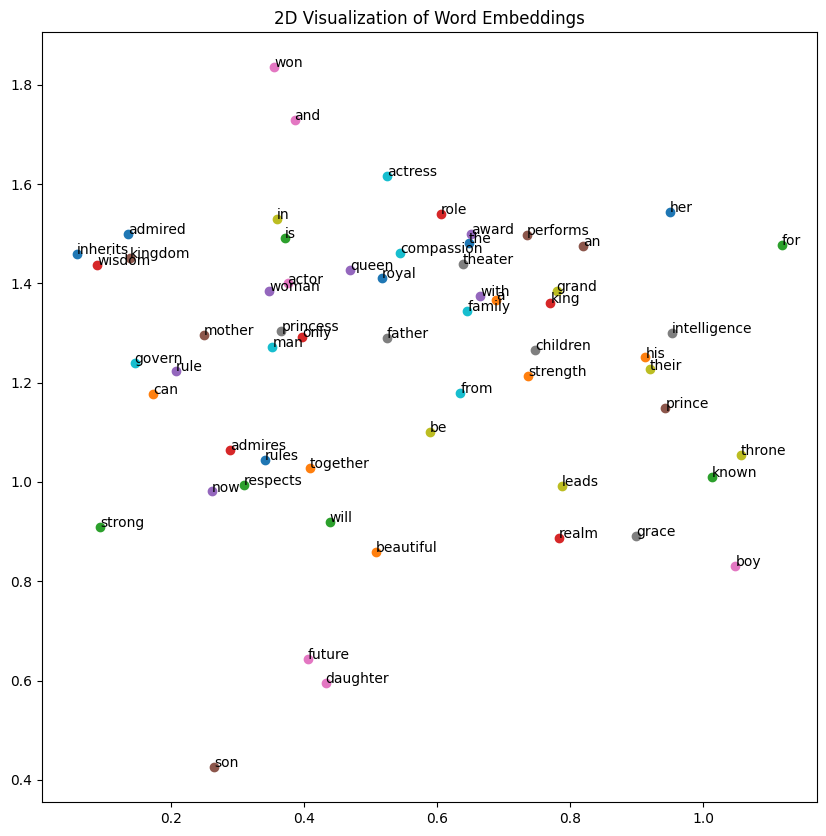

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for word in list(word_vectors_dict.keys()):
    coord = word_vectors_dict.get(word)
    if coord is not None:
        plt.scatter(coord[0], coord[1])
        plt.annotate(word, (coord[0], coord[1]))

plt.title("2D Visualization of Word Embeddings")
plt.show()

Based on this result we can see that the few words are grouped togther like
`admires` , `rules` and `respect`
`award`, `performs` and `theater`

However, most of the other word groups doesn't make any sense at this point of time. The prime reason behind it is due to the embedding vector size. If we increase the embedding vector size the more nuanced relationships will be formed.

However, this demonstrates that the word2vec model tries to gather similar words together.


Now let us try the famous example of kind and queen

In [88]:
result = model.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print(result)

[('be', 0.9999998211860657)]


OOOPs! it got failed.

No worries!!! lets increase the dimensions of the vector :) 

In [89]:
model_highdimensional = Word2Vec(sentences, vector_size=16, window=5, min_count=1, workers=4, sg=1, epochs=1000, negative=10)

In [90]:
result = model_highdimensional.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print(result)

[('queen', 0.8557833433151245)]


Hurray we got it !!!! :)

## Exploring Similarities

In [94]:
 model_highdimensional.wv.most_similar("mother", topn=5)

[('admires', 0.927798867225647),
 ('inherits', 0.8661039471626282),
 ('princess', 0.8615163564682007),
 ('from', 0.8585997819900513),
 ('throne', 0.8579676151275635)]

In [95]:
 model_highdimensional.wv.most_similar("father", topn=5)

[('respects', 0.9215425848960876),
 ('throne', 0.8824634552001953),
 ('prince', 0.861110270023346),
 ('from', 0.8586324453353882),
 ('inherits', 0.8541713356971741)]

Here, we can see that the most similar word to `mother` is `admire`, which makes perfect sense. Similarly, for `father`, the most similar word is `respect`.

This also helps us explore the idea of finding the most similar words, akin to finding the most similar products in a recommendation system. Imagine that instead of sentences, we have a transaction table. We need to find the most similar products to recommend together.

Rather than using traditional Apriori for association rule mining, we can apply Word2Vec on a large dataset to derive a set of recommendations. This can be used in conjunction with traditional association algorithms to improve the quality of recommendations.

## Extending Similarties vis-a-vis Recommendations

In [96]:
import random

transactions = [
    ["laptop", "mouse", "keyboard", "usb_c_hub"],
    ["smartphone", "wireless_charger", "earbuds", "phone_case"],
    ["gaming_console", "gaming_controller", "headset", "gaming_mouse"],
    ["tv", "soundbar", "streaming_device"],
    ["tablet", "stylus", "tablet_case"],
    ["laptop", "external_hard_drive", "usb_c_hub"],
    ["smartphone", "screen_protector", "phone_case"],
    ["gaming_console", "gaming_headset", "gaming_keyboard"],
    ["tv", "bluetooth_speaker", "universal_remote"],
    ["tablet", "portable_charger", "tablet_stand"],
    ["camera", "tripod", "memory_card", "camera_bag"],
    ["drone", "drone_batteries", "camera", "action_cam"],
    ["smartwatch", "fitness_band", "wireless_earbuds"],
    ["gaming_console", "gaming_mouse", "gaming_monitor"],
    ["smartphone", "portable_charger", "wireless_earbuds"],
]

random.shuffle(transactions)


In [107]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=transactions, vector_size=100, window=4, min_count=1, workers=4, sg=1, epochs=1000, negative=5)

In [108]:
product = "laptop"
recommendations = model.wv.most_similar(product, topn=5)

print(f"Top recommendations for '{product}':")
for item, score in recommendations:
    print(f"{item}: {score:.4f}")

Top recommendations for 'laptop':
mouse: 0.9697
usb_c_hub: 0.9696
camera: 0.9673
keyboard: 0.9666
tripod: 0.9665


Hurray!! We have constructed a mini and simple recommendation model using Word2Vec. 

Wow! this isn't beautiful

```{=html}
<script src="https://giscus.app/client.js"
        data-repo="ArunKoundinya/DeepLearning"
        data-repo-id="R_kgDOLhOfMA"
        data-category="General"
        data-category-id="DIC_kwDOLhOfMM4CeHeZ"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="dark_high_contrast"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>
```